<a href="https://colab.research.google.com/github/jangdain04-lab/TA_Airpods/blob/main/%EC%84%9C%EC%97%B0%EC%96%B8%EB%8B%88%EA%B1%B0%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yeon524/kpop-lyrics-analytics.git
!ls kpop-lyrics-analytics

Cloning into 'kpop-lyrics-analytics'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 196 (delta 3), reused 9 (delta 3), pack-reused 185 (from 1)
Receiving objects: 100% (196/196), 41.17 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (71/71), done.
analytics_kiwi.ipynb	       clustering.ipynb  lda.html    requirements.txt
analytics_konlpy.ipynb	       datasets		 lyrics.d2v
analytics_repeatability.ipynb  docs		 README.md


In [2]:
!ls kpop-lyrics-analytics/datasets


language_ratio_per_year.csv   lyrics_word_count_kiwi.csv
lyrics_by_year_1964_2023.csv  lyrics_word_count_konlpy.csv


In [3]:
import pandas as pd

df = pd.read_csv("kpop-lyrics-analytics/datasets/lyrics_by_year_1964_2023.csv")

# 1970~2020 필터링
df = df[(df['year'] >= 1970) & (df['year'] <= 2019)]
df = df.dropna(subset=['lyric'])

df.head()


,id,year,title,singer,lyric,x_rated
171,4058660,1970,소양강처녀,김태희,해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...,False
173,3773396,1970,가는 정 오는 정,남정희,아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...,False
175,3622569,1970,이정표 없는 거리,김상진,이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...,False
176,3621632,1970,아마도 빗물이겠지,이상열,맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...,False
177,3621631,1970,난이야,이상열,난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...,False


In [4]:
# 필터링: 1970 ~ 2019
df = df[(df['year'] >= 1970) & (df['year'] <= 2019)].copy()

# 가사 없는 행 제거
df = df.dropna(subset=['lyric'])

In [5]:
!jupyter nbconvert --to script kpop-lyrics-analytics/analytics_kiwi.ipynb

[NbConvertApp] Converting notebook kpop-lyrics-analytics/analytics_kiwi.ipynb to script
[NbConvertApp] Writing 30086 bytes to kpop-lyrics-analytics/analytics_kiwi.py


In [6]:
!pip install -r kpop-lyrics-analytics/requirements.txt
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 83.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [7]:
import pandas as pd
import re
# 한글/영문 비율 계산 함수
def calc_lang_ratio(text):
    hangul = re.findall(r"[가-힣]", text)
    english = re.findall(r"[A-Za-z]", text)

    h_count = len(hangul)
    e_count = len(english)
    total = len(text)

    return pd.Series({
        "hangul_ratio": h_count / total if total > 0 else 0,
        "english_ratio": e_count / total if total > 0 else 0,
        "hangul_count": h_count,
        "english_count": e_count,
        "total_chars": total
    })

# df에 적용
lang_df = df['lyric'].apply(calc_lang_ratio)
df = pd.concat([df, lang_df], axis=1)

df.head()


,id,year,title,singer,lyric,x_rated,hangul_ratio,english_ratio,hangul_count,english_count,total_chars
171,4058660,1970,소양강처녀,김태희,해 저문 소양강에 황혼이 지면\n외로운 갈대 밭이\n슬피 우는 두견새야\n열 여덣 ...,False,0.712042,0.0,136.0,0.0,191.0
173,3773396,1970,가는 정 오는 정,남정희,아롱진 옷자락에\n서글픈 사연 안고\n내 마음은 울면서도\n겉으로는 웃으며\n사랑도...,False,0.711656,0.0,116.0,0.0,163.0
175,3622569,1970,이정표 없는 거리,김상진,이리 가면 고향이오\n저리 가면 타향인데\n이정표 없는 거리\n헤매 도는 삼거리 길...,False,0.686047,0.0,118.0,0.0,172.0
176,3621632,1970,아마도 빗물이겠지,이상열,맺지 못할 사랑이기에\n말없이 헤어졌고\n돌아서는 두발 길에\n이슬비는 내리네\n사...,False,0.732620,0.0,137.0,0.0,187.0
177,3621631,1970,난이야,이상열,난이야 난이야\n사랑을 모두 주고\n울며 떠나간 너 바보구나\n때늦은 후회지만\n너...,False,0.733668,0.0,146.0,0.0,199.0


In [8]:
year_ratio = df.groupby('year')[['hangul_ratio', 'english_ratio']].mean()
year_ratio.head()


,hangul_ratio,english_ratio
year,,
1970,0.720243,0.000000
1971,0.714106,0.012025
1972,0.725891,0.000000
1973,0.729869,0.000000
1974,0.724830,0.000000


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# x축을 반드시 실제 year 컬럼으로!
years = year_ratio['year']

plt.plot(years, year_ratio['hangul_ratio'], label='Hangul Ratio', linewidth=2)
plt.plot(years, year_ratio['english_ratio'], label='English Ratio', linewidth=2)

plt.title("Hangul vs English Ratio in K-pop Lyrics (1970–2019)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Ratio")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.xlim(1970, 2019)

plt.show()


KeyError: 'year'

<Figure size 1200x600 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 연도별 평균 비율
year_ratio = df.groupby('year')[['hangul_ratio', 'english_ratio']].mean().reset_index()

# 한글+영어만 100%가 되도록 정규화
denom = year_ratio['hangul_ratio'] + year_ratio['english_ratio']
korean_pct  = np.where(denom > 0, year_ratio['hangul_ratio'] / denom * 100, 0)
english_pct = np.where(denom > 0, year_ratio['english_ratio'] / denom * 100, 0)

years = year_ratio['year']


/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3379851012.py:16: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout

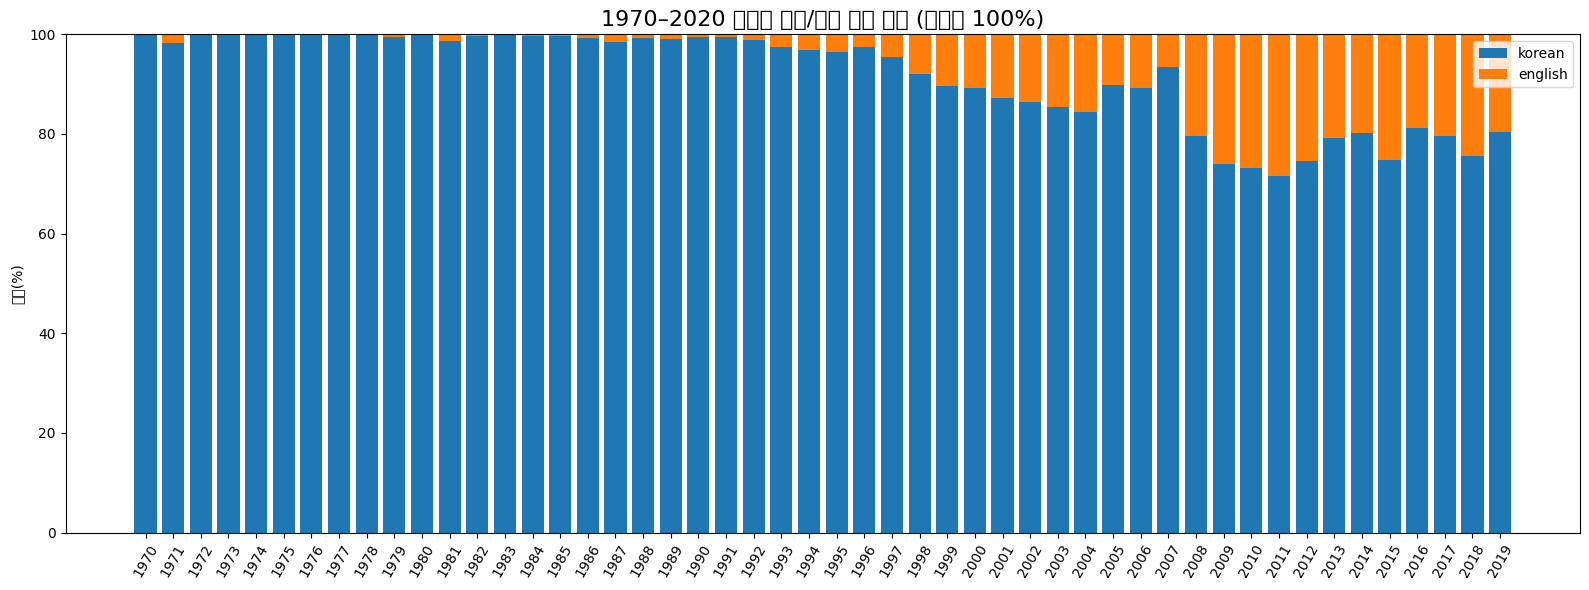

In [12]:
plt.figure(figsize=(16, 6))

# 한글 비율 (아래 파란 부분)
plt.bar(years, korean_pct, label='korean')

# 영어 비율 (위에 초록 부분, bottom=한글)
plt.bar(years, english_pct, bottom=korean_pct, label='english')

plt.title("1970–2020 연도별 한글/영어 가사 비율 (정규화 100%)", fontsize=16)
plt.ylabel("비율(%)")
plt.ylim(0, 100)

plt.xticks(years, rotation=60)
plt.legend()

plt.tight_layout()
plt.show()


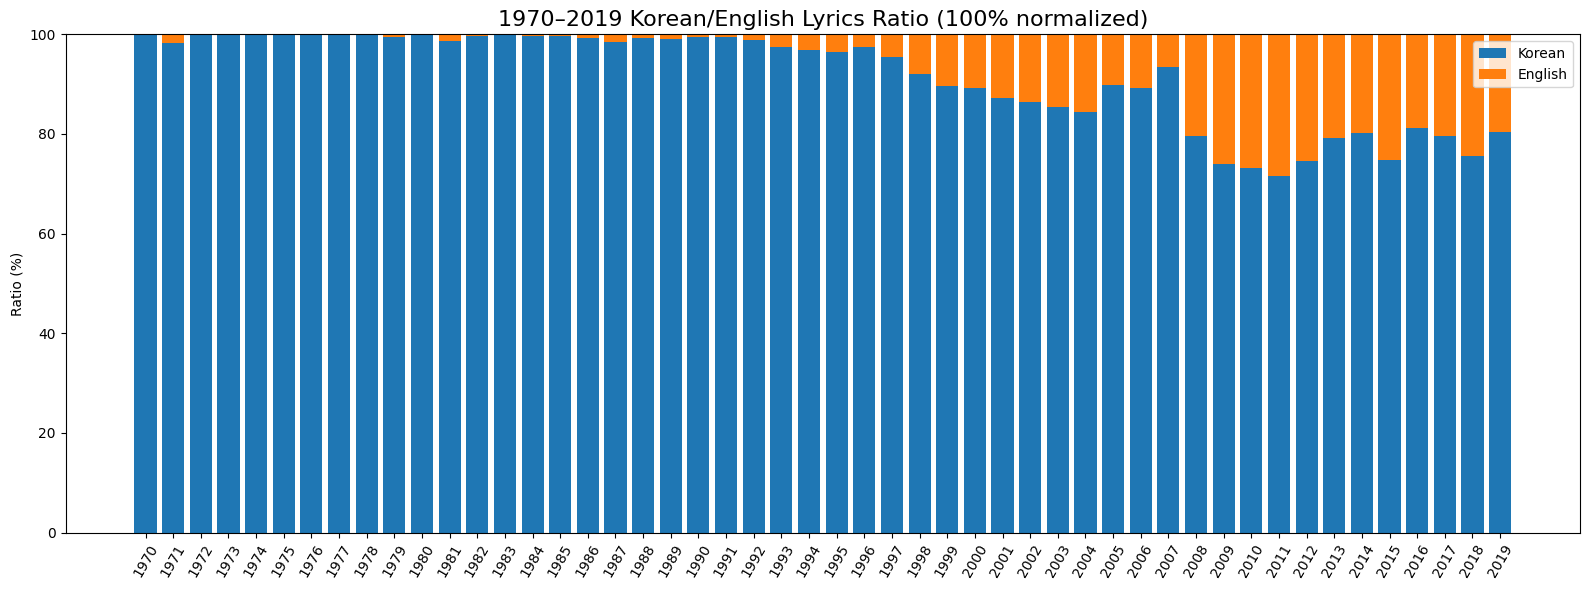

In [13]:
plt.figure(figsize=(16, 6))

# Korean ratio (blue)
plt.bar(years, korean_pct, label='Korean')

# English ratio (green) stacked above Korean
plt.bar(years, english_pct, bottom=korean_pct, label='English')

plt.title("1970–2019 Korean/English Lyrics Ratio (100% normalized)", fontsize=16)
plt.ylabel("Ratio (%)")
plt.ylim(0, 100)

plt.xticks(years, rotation=60)
plt.legend()

plt.tight_layout()
plt.show()


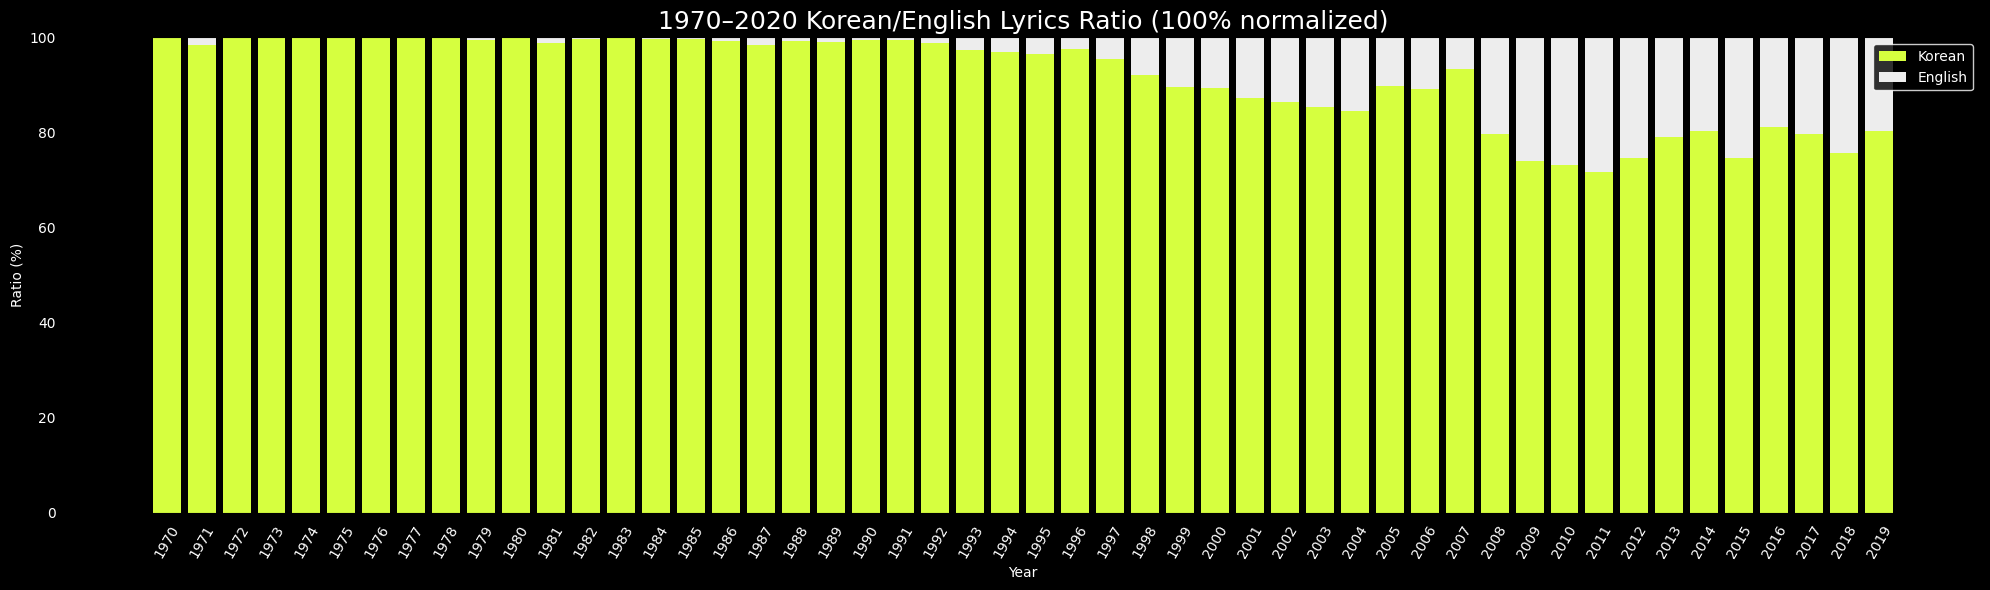

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Normalize percentages so Korean + English = 100 ----
total = korean_pct + english_pct
korean_norm = (korean_pct / total) * 100
english_norm = (english_pct / total) * 100

# ---- Plot ----
plt.figure(figsize=(20, 6))

plt.rcParams['axes.facecolor'] = '#000000'
plt.rcParams['figure.facecolor'] = '#000000'

plt.bar(years, korean_norm, label='Korean', color="#d6ff3f")
plt.bar(years, english_norm, bottom=korean_norm, label='English', color="#ededed")

plt.title("1970–2020 Korean/English Lyrics Ratio (100% normalized)", color="white", fontsize=18)
plt.xlabel("Year", color="white")
plt.ylabel("Ratio (%)", color="white")

plt.xticks(years, rotation=60, color="white")
plt.yticks(color="white")

legend = plt.legend()
plt.setp(legend.get_texts(), color="white")
legend.get_frame().set_facecolor('#000000')
legend.get_frame().set_edgecolor("#ffffff")

plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [14]:
!pip install kiwipiepy wordcloud

In [18]:
from kiwipiepy import Kiwi
from collections import Counter

kiwi = Kiwi()

# 명사/동사/형용사/부사만 남기기
ALLOWED_TAGS = {'NNG', 'NNP', 'VV', 'VA', 'MAG'}

def tokenize_lyric(text):
    tokens = []
    for tok in kiwi.tokenize(text):
        form = tok.form
        tag  = tok.tag

        if tag not in ALLOWED_TAGS:
            continue

        # 동사, 형용사는 '다' 떼고 기본형 느낌으로
        if tag in {'VV', 'VA'} and form.endswith('다'):
            form = form[:-1]

        tokens.append((form, tag))
    return tokens

In [19]:
# 각 곡마다 형태소 리스트 저장
df['tokens'] = df['lyric'].apply(tokenize_lyric)

# (확인)
df[['year', 'title', 'tokens']].head()

,year,title,tokens
171,1970,소양강처녀,"[(해, NNG), (저물, VV), (소양강, NNP), (황혼, NNG), (지..."
173,1970,가는 정 오는 정,"[(아롱, NNG), (지, VV), (옷자락, NNG), (서글프, VA), (사..."
175,1970,이정표 없는 거리,"[(이리, MAG), (가, VV), (고향, NNG), (저리, MAG), (가,..."
176,1970,아마도 빗물이겠지,"[(맺, VV), (사랑, NNG), (말없이, MAG), (헤어지, VV), (돌..."
177,1970,난이야,"[(사랑, NNG), (모두, MAG), (주, VV), (울, VV), (떠나가,..."


In [20]:
'''
import zipfile, os

zip_path = "kpop-lyrics-analytics/notosanskr.zip"
extract_dir = "fonts"

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_dir)

# 폰트 파일 이름은 압축 풀린 폴더 안에서 한 번 확인해서 바꿔줘
font_path = [f for f in os.listdir(extract_dir) if f.lower().endswith('.otf') or f.lower().endswith('.ttf')][0]
font_path = os.path.join(extract_dir, font_path)
font_path
'''

FileNotFoundError: [Errno 2] No such file or directory: 'kpop-lyrics-analytics/notosanskr.zip'

In [23]:
!sudo apt-get update
!sudo apt-get install -y fonts-noto fonts-noto-cjk
!fc-cache -fv


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,842 kB]


In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# Find the exact Noto Sans font name
fonts = [f.name for f in fm.fontManager.ttflist if "Noto Sans" in f.name]
print(fonts)  # 어떤 이름으로 등록되어 있는지 확인


[]


In [29]:
!sudo apt-get update
!sudo apt-get install -y fonts-nanum
!fc-cache -fv


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 설치된 폰트 중 'Nanum' 포함된 이름 확인
[f.name for f in fm.fontManager.ttflist if "Nanum" in f.name]


[]

In [33]:
!mkdir -p /usr/share/fonts/truetype/custom/
!wget -O /usr/share/fonts/truetype/custom/NanumGothic.ttf \
    https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf

!fc-cache -fv


--2025-12-07 05:33:31--  https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf [following]
--2025-12-07 05:33:32--  https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2054744 (2.0M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/custom/NanumGothic.ttf’

/usr/share/fonts/tr 100%[===================>]   1.96M  10.7MB/s    in 0.2s    

2025-12-07 05:33:32 (10.7

In [34]:
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if "Nanum" in f.name]


['NanumGothic']

In [35]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def make_wordcloud(tokens, title, max_words=200):
    freq = Counter(tokens)
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=600,
        max_words=max_words
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(6,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


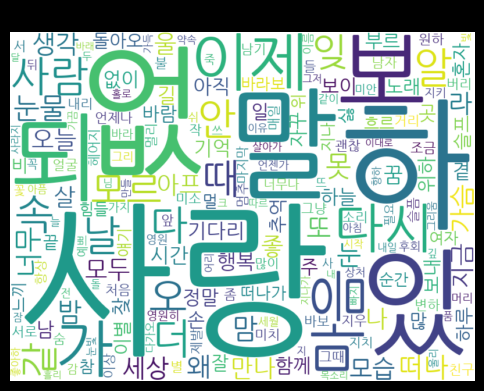

In [37]:
# Extract only the forms from tokens
all_korean_tokens = [form for row in df['tokens'] for form, tag in row]

make_wordcloud(all_korean_tokens, "Top Keywords (1970–2019)")


In [42]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

font_path = "/usr/share/fonts/truetype/custom/NanumGothic.ttf"

theme_colors = [
    "#d6ff3f", "#ededed", "#cfff51", "#e4ff78", "#f0ffb0",
    "#b4ff1f", "#99ff66", "#ddff99", "#fbfff0",
    "#ccff55", "#eeffcc", "#bbff22", "#aaff33"
]

def theme_color_func(word, font_size, position, orientation, font_path, random_state):
    return random.choice(theme_colors)

def make_wordcloud(tokens, title, max_words=200):
    freq = Counter(tokens)

    wc = WordCloud(
        font_path=font_path,
        width=1200, height=900,
        background_color="#000000",
        color_func=theme_color_func,
        max_words=max_words
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, color="white", fontsize=28)
    plt.show()


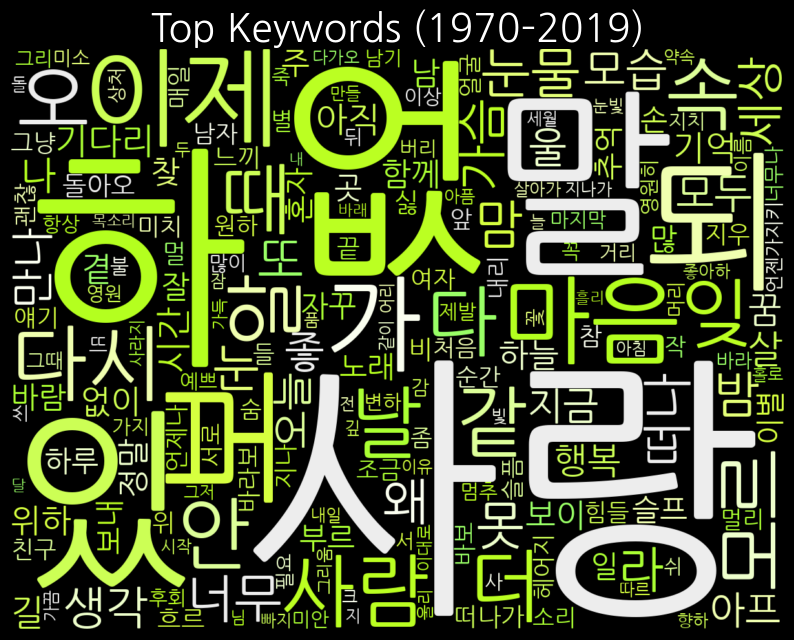

In [43]:
all_korean_tokens = [form for row in df['tokens'] for form, tag in row]
make_wordcloud(all_korean_tokens, "Top Keywords (1970–2019)")


In [ ]:
# Add decade column
df['decade'] = (df['year'] // 10) * 10    # 1970, 1980, ...

for decade, group in df.groupby('decade'):
    tokens_decade = [form for row in group['tokens'] for form, tag in row]

    title = f"Top Keywords of {decade}s"

    make_wordcloud(tokens_decade, title)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Token length per song
df['token_len'] = df['tokens'].apply(len)

year_len = df.groupby('year')['token_len'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.scatter(year_len['year'], year_len['token_len'], alpha=0.6)

# Simple regression line
z = np.polyfit(year_len['year'], year_len['token_len'], 1)
p = np.poly1d(z)
plt.plot(year_len['year'], p(year_len['year']), linestyle='--')

plt.xlabel('Year')
plt.ylabel('Average Token Count')
plt.title('Change in Average Lyric Length by Year (based on morphemes)')
plt.show()

In [ ]:
from collections import defaultdict

# 품사별 전체 카운트
pos_counts = defaultdict(Counter)

for row in df['tokens']:
    for form, tag in row:
        pos_counts[tag][form] += 1

# 태그를 크게 4종류로 묶자 (명사/동사/형용사/부사)
POS_MAP = {
    'NNG': 'NOUN',
    'NNP': 'NOUN',
    'VV': 'VERB',
    'VA': 'ADJ',
    'MAG': 'ADV'
}

grouped_counts = defaultdict(Counter)
for tag, cnt in pos_counts.items():
    if tag not in POS_MAP:
        continue
    big = POS_MAP[tag]
    for word, c in cnt.items():
        grouped_counts[big][word] += c


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'   # 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 워드클라우드에서 쓰던 한글 폰트 경로 (이미 font_path 변수에 들어있다는 전제)
kfont = fm.FontProperties(fname=font_path)

def plot_top_words(counter, title, top_n=15):
    top = counter.most_common(top_n)
    words = [w for w, c in top]
    counts = [c for w, c in top]

    plt.figure(figsize=(10, 4))
    plt.bar(words, counts)

    # x축 라벨에 한글 폰트 적용
    plt.xticks(rotation=45, fontproperties=kfont)
    # y축 라벨, 제목에도 한글 폰트 적용 (제목은 영어지만 폰트는 한글 지원폰트라 괜찮음)
    plt.ylabel('Frequency', fontproperties=kfont)
    plt.title(title, fontproperties=kfont)

    plt.tight_layout()
    plt.show()

# 실행
plot_top_words(grouped_counts['NOUN'], "Top 15 Nouns")
plot_top_words(grouped_counts['VERB'], "Top 15 Verbs")
plot_top_words(grouped_counts['ADJ'],  "Top 15 Adjectives")
plot_top_words(grouped_counts['ADV'],  "Top 15 Adverbs")


In [ ]:
stopwords = set([
    "있", "없", "때", "말", "좀", "더", "왜", "또", "난", "난다", "그냥",
    "아직", "이제", "정말", "마저", "다시", "너무", "보다", "처럼", "에게",
    "에서", "으로", "까지", "만큼", "뿐", "듯", "건", "거", "것",
    "내", "네", "나", "너", "우리", "모든",
    "은", "는", "이", "가", "을", "를", "도", "와", "과", "에", "의",
])


In [ ]:
def clean_tokens(token_list):
    return [
        form for form, tag in token_list
        if form not in stopwords
        and len(form) > 1  # 한 글자 단어 제거
        and tag not in ["JKS", "JKC", "JKB", "JKG", "JKO", "JX", "JC", "EP", "EF", "EC", "ETN", "ETM"]
        # 조사, 어미 제거
    ]


In [ ]:
df['clean_tokens'] = df['tokens'].apply(clean_tokens)


In [ ]:
# 1) decade 컬럼 만들기 (이미 있으면 다시 안 만들어도 됨)
df['decade'] = (df['year'] // 10) * 10   # 1970, 1980, ...

# 2) 전처리된 clean_tokens로 10년대별 워드클라우드 만들기
for decade, group in df.groupby('decade'):
    # 이 10년대에 속한 곡들의 clean_tokens 다 펼치기
    tokens_decade = [form for row in group['clean_tokens'] for form in row]

    # 워드클라우드 그리기
    make_wordcloud(tokens_decade, f"Top Keywords of {decade}s")


In [ ]:
# (형태소만 뽑기: form만)  → 전처리 적용 버전
all_korean_tokens = [form for row in df['clean_tokens'] for form in row]
make_wordcloud(all_korean_tokens, "Top Keywords of 1970–2019 (cleaned)")


In [ ]:
# 가사 길이(글자 수)
df['lyric_len'] = df['lyric'].apply(lambda x: len(str(x)))

# 가장 긴 가사 TOP 20
longest_lyrics = df.sort_values('lyric_len', ascending=False).head(20)
print(longest_lyrics[['year', 'singer', 'title', 'lyric_len']])

# 가장 짧은 가사 TOP 20
shortest_lyrics = df.sort_values('lyric_len', ascending=True).head(20)
print(shortest_lyrics[['year', 'singer', 'title', 'lyric_len']])

In [ ]:
# --- Install Hangul font (Colab) ---
!sudo apt-get install -qq fonts-noto-cjk

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 경로 직접 등록
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# matplotlib 전역 설정
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

print("사용 중인 폰트:", fontprop.get_name())


In [ ]:
plt.figure()
plt.plot([1,2,3],[1,4,9])
plt.title("한글 테스트: 방탄소년단 / 아이유 / 레드벨벳", fontproperties=fontprop)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumBarunGothic'   # 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

top_long = (
    longest_lyrics
    .head(20)
    .sort_values('lyric_len', ascending=True)
)

plt.figure(figsize=(10, 8))
plt.barh(
    top_long['title'] + " - " + top_long['singer'],
    top_long['lyric_len']
)

plt.title("Top 20 Songs with Longest Lyrics (by characters)", fontproperties=font_prop)
plt.xlabel("Lyrics length (number of characters)", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt

# 폰트 파일 경로 (Colab에서도 존재)
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 짧은 가사 Top 20
top_short = (
    shortest_lyrics
    .head(20)
    .sort_values('lyric_len', ascending=True)
)

plt.figure(figsize=(10, 8))
plt.barh(
    top_short['title'] + " - " + top_short['singer'],
    top_short['lyric_len']
)

plt.title("Top 20 Songs with Shortest Lyrics (by characters)", fontproperties=font_prop)
plt.xlabel("Lyrics length (number of characters)", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

plt.yticks(fontproperties=font_prop)  # 🎯 y축에 폰트 적용 (제목/가수 한글!)

plt.tight_layout()
plt.show()


In [ ]:
df['token_len'] = df['tokens'].apply(len)

most_tokens = df.sort_values('token_len', ascending=False).head(20)
print(most_tokens[['year', 'singer', 'title', 'token_len']])


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# --- 한글 폰트 지정 (Colab에서도 100% 존재하는 경로) ---
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# --- Top 20 songs by number of tokens ---
top_tokens = (
    most_tokens
    .head(20)
    .sort_values('token_len', ascending=True)   # barh는 아래→위로 증가
)

plt.figure(figsize=(10, 8))

plt.barh(
    top_tokens['title'] + " - " + top_tokens['singer'],
    top_tokens['token_len']
)

plt.title("Top 20 Songs with Most Tokens (Morpheme Count)", fontproperties=font_prop)
plt.xlabel("Number of Tokens", fontproperties=font_prop)
plt.ylabel("Song (title - artist)", fontproperties=font_prop)

# y축 라벨(곡명-가수명)에 한글 폰트 적용
plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [ ]:
# 가수별 평균 가사 길이 (곡 5곡 이상)
artist_stats = (
    df.groupby('singer')
      .agg(avg_len=('lyric_len', 'mean'), songs=('title', 'count'))
      .query('songs >= 5')
      .sort_values('avg_len', ascending=False)
      .head(20)
)

artist_stats


In [ ]:
decade_len = df.groupby('decade')['lyric_len'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(decade_len['decade'], decade_len['lyric_len'], marker='o')
plt.title("Average Lyrics Length by Decade (1970–2020)")
plt.xlabel("Decade")
plt.ylabel("Avg lyric length (characters)")
plt.grid(True)
plt.show()


In [ ]:
emotion_dict = {
    "love": ["사랑", "좋아", "그리움", "보고싶어", "연인"],
    "sad": ["눈물", "아프", "슬프", "이별", "후회"],
    "anger": ["미워", "화", "짜증", "분노"],
}

# 감정 단어 포함 여부 count
def emotion_score(tokens):
    words = [form for form, tag in tokens]
    return {
        emo: sum(word in words for word in emotion_dict[emo])
        for emo in emotion_dict
    }

df_emotion = df['tokens'].apply(emotion_score).apply(pd.Series)
df_emotion['year'] = df['year']

emotion_by_year = df_emotion.groupby('year').sum()
emotion_by_year.plot(figsize=(12,6))
plt.title("Emotion Keyword Trend over Time")
plt.show()


In [ ]:
df['unique_tokens'] = df['tokens'].apply(lambda x: len(set([t[0] for t in x])))

lex_div = df.groupby('year')['unique_tokens'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(lex_div['year'], lex_div['unique_tokens'])
plt.title("Lexical Diversity of Lyrics by Year")
plt.xlabel("Year")
plt.ylabel("Unique token count")
plt.show()
